# Multiple Linear Regression

## Model Diagnostics - Residual values

In [61]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sms
import statsmodels.api as sm

### Import dataset

In [62]:
df = pd.read_csv('base_funcionarios_v4.csv', 
                 sep=',', 
                 index_col=0)
df.shape

(46, 5)

In [63]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
0,5517.4,3,3,9.777079,Não
1,6399.9,4,6,3.765998,Não
2,6206.7,6,3,7.926264,Não
3,6060.6,4,5,2.233497,Não
4,6122.7,2,9,26.821842,Não


### Exploratory Data Analysis (EDA)

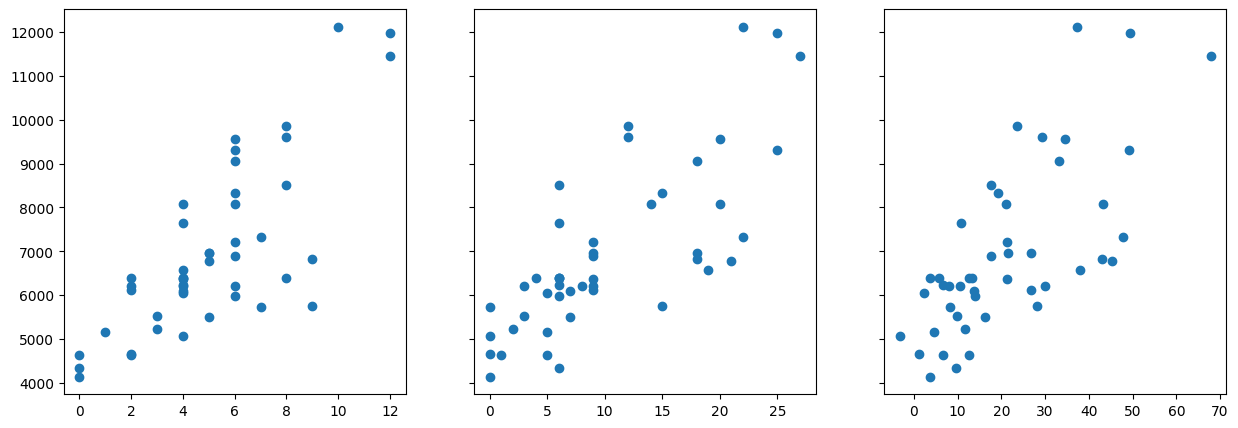

In [64]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,sharey=True,figsize=(15,5))
ax1.scatter(df['Anos_Educ_Superior'],df['Salario']);
ax2.scatter(df['Tempo_Empresa'],df['Salario']);
ax3.scatter(df['Tempo_de_Carreira'],df['Salario']);

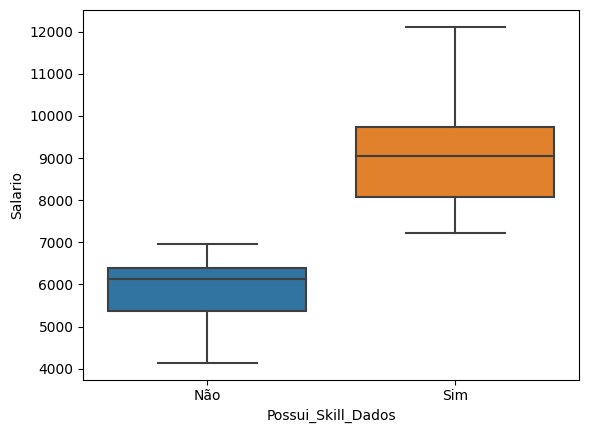

In [65]:
sns.boxplot(x=df['Possui_Skill_Dados'], y=df['Salario']);

Based on the boxplot above, the difference in data distribution between "Sim" and "Não" on the variable "Has Data Skills" indicates that it may be a good fit to the model when explaining the variability on the target variable named "Salário" - we may get a better / higher R² and therefore better estimates.

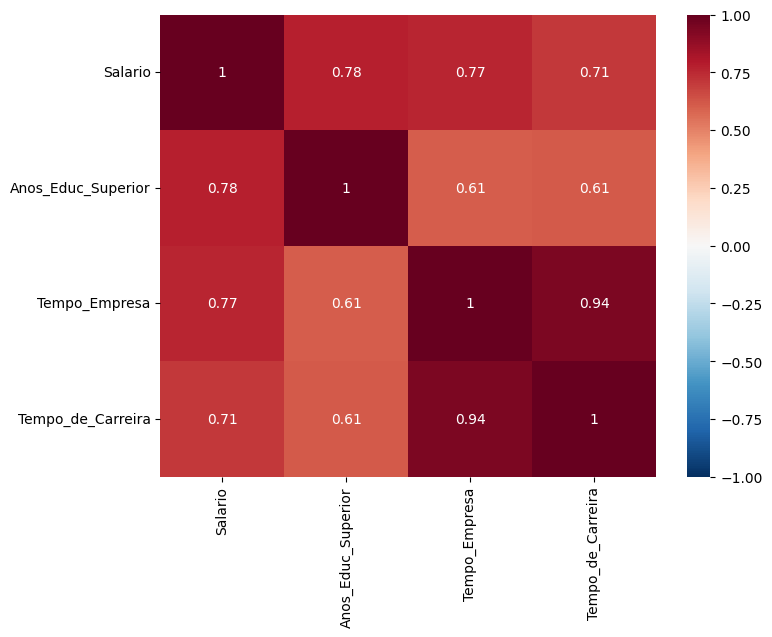

In [66]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.loc[:,"Salario":"Tempo_de_Carreira"].corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True);

### Data Preparation

#### Creating Dummy variables

In [67]:
df.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
39,8082.2,4,20,43.252417,Sim
25,4645.9,0,5,12.640970,Não
26,5736.9,7,0,8.222066,Não
44,6235.4,4,6,6.578993,Não
35,9857.1,8,12,23.448417,Sim


In [68]:
# 1st Option: Using get_dummies()
df2 = pd.get_dummies(df, drop_first=True)
df2.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados_Sim
39,8082.2,4,20,43.252417,True
25,4645.9,0,5,12.640970,False
26,5736.9,7,0,8.222066,False
44,6235.4,4,6,6.578993,False
35,9857.1,8,12,23.448417,True


In [69]:
# 2nd Option: Using np.where()
df3 = df.copy() # Copia o dataframe
df3['Possui_Skill_Dados_Sim'] = np.where(df['Possui_Skill_Dados'] == 'Sim', 1, 0)
df3.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados,Possui_Skill_Dados_Sim
39,8082.2,4,20,43.252417,Sim,1
25,4645.9,0,5,12.640970,Não,0
26,5736.9,7,0,8.222066,Não,0
44,6235.4,4,6,6.578993,Não,0
35,9857.1,8,12,23.448417,Sim,1


In [70]:
# 3rd Option: Usando map()
de_para = {'Sim': 1, 'Não': 0} 

df4 = df.copy() # Copying the dataframe
df4['Possui_Skill_Dados_Sim'] = df['Possui_Skill_Dados'].map(de_para)
df4.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados,Possui_Skill_Dados_Sim
39,8082.2,4,20,43.252417,Sim,1
25,4645.9,0,5,12.640970,Não,0
26,5736.9,7,0,8.222066,Não,0
44,6235.4,4,6,6.578993,Não,0
35,9857.1,8,12,23.448417,Sim,1


### Adjusting the regression model using Statsmodels

In [71]:
df3.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados,Possui_Skill_Dados_Sim
0,5517.4,3,3,9.777079,Não,0
1,6399.9,4,6,3.765998,Não,0
2,6206.7,6,3,7.926264,Não,0
3,6060.6,4,5,2.233497,Não,0
4,6122.7,2,9,26.821842,Não,0


In [72]:
# Target variable
y = df3['Salario']

# Feature variables
df3['intercepto'] = 1 

x = df3[['intercepto',
         'Anos_Educ_Superior',
         'Tempo_Empresa',
         'Tempo_de_Carreira',
         'Possui_Skill_Dados_Sim']]

In [73]:
# Adjusting the model and printing the results
modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     66.10
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           2.49e-17
Time:                        17:11:01   Log-Likelihood:                -366.46
No. Observations:                  46   AIC:                             742.9
Df Residuals:                      41   BIC:                             752.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercepto              4405

Since a multicollinearity issue is identified, and the variable "Tempo de Carreira" has a negative coefficient and a high p-value (0.334), we are excluding this variable from the model.

Information presented in this variable is already mostly present in the variable "Tempo_Empresa".

In [74]:
# Variável resposta
y = df3['Salario']

# Variáveis explicativas
df3['intercepto'] = 1 

x = df3[['intercepto',
         'Anos_Educ_Superior',
         'Tempo_Empresa',
         'Possui_Skill_Dados_Sim']]

In [75]:
# Ajusta o modelo e retorna os resultados
modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     87.90
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           3.87e-18
Time:                        17:11:02   Log-Likelihood:                -366.99
No. Observations:                  46   AIC:                             742.0
Df Residuals:                      42   BIC:                             749.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercepto              4412

### Equation for the model

Salário = $\beta_0$ + $\beta_1$ x Anos Educação Superior + $\beta_2$ x Tempo Empresa + $\beta_3$ x Possui Skill Dados (Sim)

### Model Diagnostic: Analysis of Residuals

In [76]:
def grafico_residuos(resultado):
    resid_graf = sns.scatterplot(x=list(range(0,len(resultado.resid_pearson))),
                                 y=resultado.resid_pearson.tolist())
    
    # Locate the min residual value
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(-3)
    ymin = min(r_aux) * 1.1
    
    # Locate the max residual value
    r_aux = resultado.resid_pearson.tolist()
    r_aux.append(+3)
    ymax = max(r_aux) * 1.1
    
    resid_graf.set(ylim=(ymin, ymax))
    
    ax1 = resid_graf.axes
    ax1.axhline( 0, color='black', ls='--')
    ax1.axhline(-2, color='black', ls='--')
    ax1.axhline(+2, color='black', ls='--')
    plt.show()

In [77]:
len(df.index)*0.05

2.3000000000000003

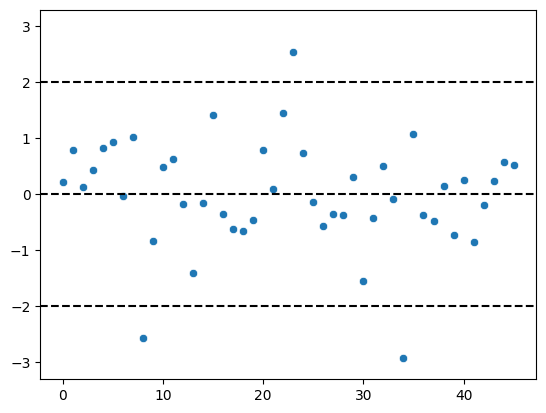

In [78]:
grafico_residuos(resultado)

Chart confirms that most observations are within the expected range in the normal distribution, which confirms the model is having a good fit.

#### Normality of Residuals

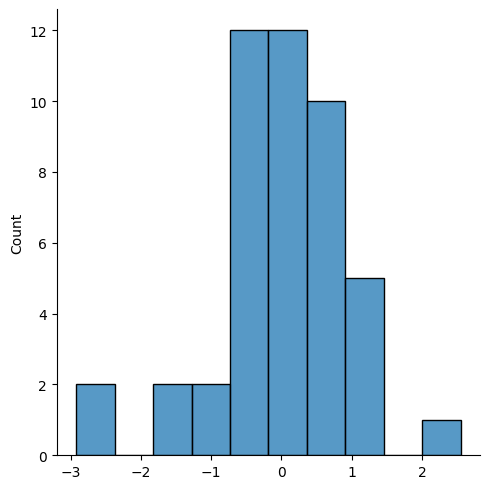

In [84]:
# Building the histogram to evaluate the distribution of residuals
sns.displot(resultado.resid_pearson);

The histogram chart indicates that the observations follow a normal distribution curve. Hypothesis testing will add an extra validation.

In [85]:
# Hypothesis testing to evaluate the normality, using the Shapiro module
from scipy.stats import shapiro
normalidade = shapiro(resultado.resid_pearson)
print('Estatística=%.3f, p-valor=%.3f\n' % (normalidade.statistic, normalidade.pvalue))

Estatística=0.951, p-valor=0.054



p-value of 5.4% confirms H0 is not rejected - data is statistically confirmed to be in a normal distribution.

#### Homoscedasticity of Residuals

In [86]:
# White test for Homoscedasticity
from statsmodels.stats.diagnostic import het_white
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

In [87]:
white_test = het_white(resultado.resid_pearson,
                       resultado.model.exog)

In [88]:
print(dict(zip(labels, white_test)))

{'LM Statistic': 11.715298949479552, 'LM-Test p-value': 0.16436570335976225, 'F-Statistic': 1.5803917193707135, 'F-Test p-value': 0.16425024727281182}


### Interpreting the model

**Intercept or $\beta_0$**: Average salary of an employee without higher education, newly arrived at the company and without data skills is `R$4,412.54`.<br>
**$\beta_1$** x Years of Higher Education: Each additional year of higher education, maintaining company time and having constant data skills, generates an average increase of `R$247.89`.<br>
**$\beta_2$** x Time in the Company: Each additional year of time in the company, maintaining the years of higher education and constant data skills, generates an average increase of `R$67.26`.<br>
**$\beta_3$** x Has Data Skills: Acquiring data skills, keeping the years of higher education and time at the company constant, generates an average increase of `R$1,861.78`.